# Creating and plotting a rainflow matrix with fatpack and matplotlib

This notebook demonstrates how various rainflow matrices can be established with fatpack and the plotting library matplotlib.

In [2]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import rainflow
import fatpack 
from math import sin, cos
import os 
import sys
import matplotlib.pyplot as plt
np.random.seed(10)
print(fatpack.__version__)

0.7.7


## Mean vs range rainflow matrix

First we IMPORT a SIGNAL for the example and extract the rainflow cycles and corresponding means. 

In [6]:

os.listdir('Data')

['.Rhistory',
 '0865-23_ewpi_hp2Hz_cut_k27-HA-YHO-Fz_+47N.csv',
 '0865-23_ewpi_hp2Hz_cut_k27-HA-YHO-Fz_+47N.rsp',
 '0865-23_ewpi_hp2Hz_cut_k27-HA-YHO-Fz_+47N_rsp_s.nmd',
 'datos.csv',
 'HK+RBK-2.csv',
 'HK-RBK.csv',
 'rsp-to-csv.ipynb']

In [17]:
# Obtener la ruta del directorio actual
current_directory = os.getcwd()

# Obtener la lista de archivos en el directorio actual
file_list = os.listdir(current_directory)
# Filtrar los archivos que terminan con ".csv"
csv_list = [file for file in file_list if file.endswith(".csv")]

# Imprimir la lista de archivos CSV encontrados
print("Archivos CSV en el directorio actual:")
for csv_file in csv_list:
    print(csv_file)


Archivos CSV en el directorio actual:
HFVD.csv
HK+RBK-2.csv
HK-RBK.csv
LW_Force.csv
NR.csv



Archivo a cargar: c:\Users\misasi.LEANET\Desktop\Rainflow - fatpack\HK-RBK.csv

Primeros 20 registros:
           0
0   0.002325
1   0.004649
2   0.007749
3   0.010074
4   0.012398
5   0.014723
6   0.017048
7   0.019372
8   0.021697
9   0.024022
10  0.025572
11  0.027896
12  0.029446
13  0.031771
14  0.033321
15  0.034870
16  0.037195
17  0.038745
18  0.040295
19  0.041844


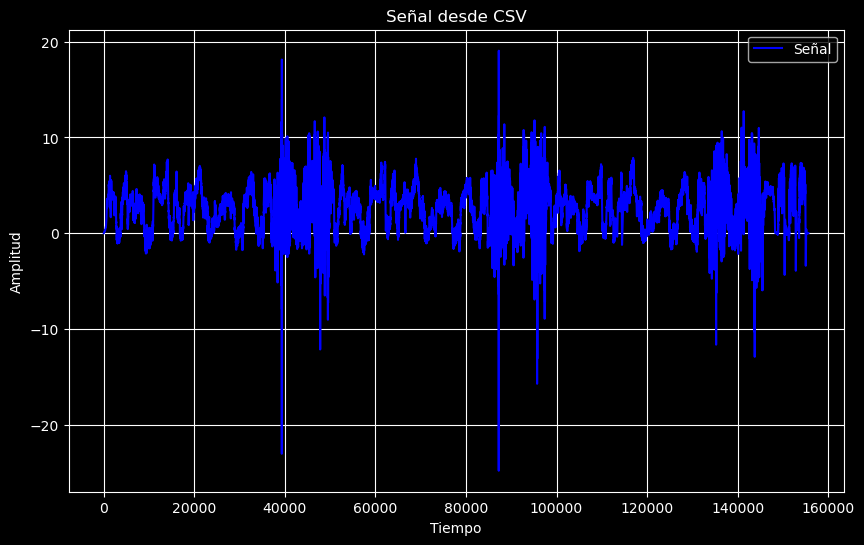

(array([0.00232469, 0.00464938, 0.00774897, ..., 0.        , 0.        ,
        0.        ]),
 array([ 0.17127656,  0.85638281,  0.17127656, ..., 28.43190938,
        41.27765156, 43.8468    ]),
 array([ 3.55037109,  3.20781797,  3.89292422, ..., -1.5022875 ,
        -2.44430859, -2.8725    ]))

In [18]:
csv_file = 'HK-RBK.csv'
file_path = os.path.join(current_directory, csv_file)
print(f"\nArchivo a cargar: {file_path}")
try:
    # Cargar el archivo CSV
    df = pd.read_csv(file_path)

    # Mostrar los primeros 20 registros
    print("\nPrimeros 20 registros:")
    print(df.head(20))

    # Cargar la señal desde el archivo CSV utilizando NumPy
    y = df.iloc[:, 0].values  # Seleccionar la primera columna y convertirla en un arreglo de NumPy

    # Calcular las amplitudes y las medias de los rangos de Rainflow
    S, Sm = fatpack.find_rainflow_ranges(y, return_means=True, k=256)
except FileNotFoundError:
    print(f"Error: No se encontró el archivo {csv_file}")

# Crear un rango de tiempo basado en el número de puntos en la señal
time = range(len(y))
# Crear la figura y los ejes
plt.figure(figsize=(10, 6))
# Graficar la señal
plt.plot(time, y, label='Señal', color='blue')
# Configurar título y etiquetas de los ejes
plt.title('Señal desde CSV')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
# Mostrar leyenda
plt.legend()
# Mostrar la gráfica
plt.grid(True)
plt.show()

# Mostrar los resultados
y, S, Sm

then create the bins to sort the range and mean values into. 

In [13]:
rowbin = np.linspace(-5, 10, 50)
colbin = np.linspace(0, 15, 50)
colbin

array([ 0.        ,  0.30612245,  0.6122449 ,  0.91836735,  1.2244898 ,
        1.53061224,  1.83673469,  2.14285714,  2.44897959,  2.75510204,
        3.06122449,  3.36734694,  3.67346939,  3.97959184,  4.28571429,
        4.59183673,  4.89795918,  5.20408163,  5.51020408,  5.81632653,
        6.12244898,  6.42857143,  6.73469388,  7.04081633,  7.34693878,
        7.65306122,  7.95918367,  8.26530612,  8.57142857,  8.87755102,
        9.18367347,  9.48979592,  9.79591837, 10.10204082, 10.40816327,
       10.71428571, 11.02040816, 11.32653061, 11.63265306, 11.93877551,
       12.24489796, 12.55102041, 12.85714286, 13.16326531, 13.46938776,
       13.7755102 , 14.08163265, 14.3877551 , 14.69387755, 15.        ])

finally we create a data array which is contains the mean values in the first column adn the range values in the second and extract the rainflow matrix. The mean-range rainflow matrix is then plotted with matplotlib.

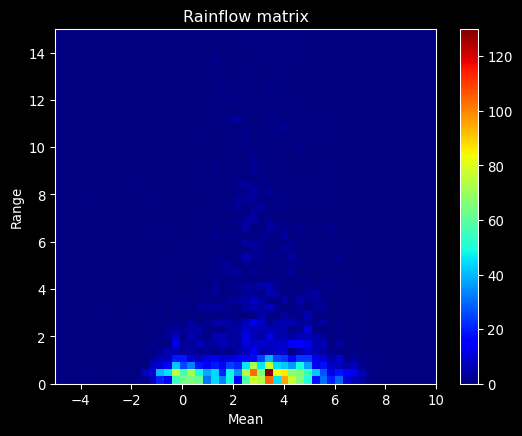

In [14]:
data_arr = np.array([Sm, S]).T
rfcmat = fatpack.find_rainflow_matrix(data_arr, rowbin, colbin)

X, Y = np.meshgrid(rowbin, colbin, indexing='ij')
plt.figure(dpi=96)
C = plt.pcolormesh(X, Y, rfcmat, cmap='jet')
plt.colorbar(C)
plt.title("Rainflow matrix")
plt.xlabel("Mean")
plt.ylabel("Range")

plt.savefig('Rainflow matrix.png')

## Start vs destination level rainflow matrix

For this rainflow matrix we must extract the cycles directly such that the start and destination point is known, we therefore begin by extracting all cycles from y.

In [7]:
rev, ix = fatpack.find_reversals(y, k=256)
cyc1, res = fatpack.find_rainflow_cycles(rev)
rev_res = fatpack.concatenate_reversals(res, res)
cyc_res, _ = fatpack.find_rainflow_cycles(rev_res)
cycles = np.concatenate((cyc1, cyc_res))

we then create bins, in this case the range (min-max) the starting level and the destination level are the same and row and column bins are the same. Finish off by plotting the result with matplotlib.

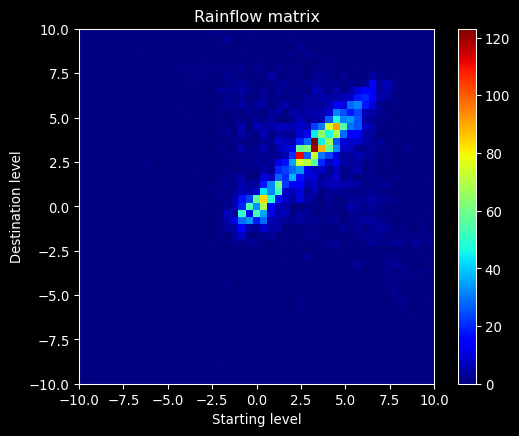

In [8]:
bins = np.linspace(-10, 10, 50)
rfcmat = fatpack.find_rainflow_matrix(cycles, bins, bins)

X, Y = np.meshgrid(bins, bins, indexing='ij')
plt.figure(dpi=96)
C = plt.pcolormesh(X, Y, rfcmat, cmap='jet')
plt.colorbar(C)
plt.title("Rainflow matrix")
plt.xlabel("Starting level")
plt.ylabel("Destination level")
plt.gca().set_aspect('equal')

plt.savefig('Rainflow-bins.png')